### Assignment 6.1: MNIST

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

from keras import layers
from keras import models
from tensorflow.keras.utils import to_categorical

from keras.datasets import mnist

**Initiating a Convnet**

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))

**Adding a Classifier**

In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

**Training Convnet on MNIST Data**

In [8]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [9]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 40s 42ms/step - loss: 0.1747 - accuracy: 0.9446
Epoch 2/5
938/938 [==============================] - 46s 49ms/step - loss: 0.0480 - accuracy: 0.9851
Epoch 3/5
938/938 [==============================] - 38s 41ms/step - loss: 0.0324 - accuracy: 0.9904
Epoch 4/5
938/938 [==============================] - 40s 43ms/step - loss: 0.0246 - accuracy: 0.9921
Epoch 5/5
938/938 [==============================] - 43s 46ms/step - loss: 0.0185 - accuracy: 0.9944


**Saving the Model**

In [12]:
model.save('results/model-6-1')

INFO:tensorflow:Assets written to: results/model-6-1/assets


**Saving the Predictions**

In [19]:
pred = model.predict(test_images)

pred = pd.DataFrame(pred)
pred.to_csv('results/model-6-1/predictions.csv')

**Saving the Metrics**

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.0331 - accuracy: 0.9903


In [24]:
print("Test Accuracy: ", test_acc)
print("Test Loss: ", test_loss)

Test Accuracy:  0.9902999997138977
Test Loss:  0.03312191739678383


In [25]:
lines = ['Test Accuracy:  0.9902999997138977', 'Test Loss:  0.03312191739678383']

In [26]:
with open('results/model-6-1/metrics.txt', 'w') as f:
    f.write('\n'.join(lines))

**Saving the Validation Plots**

In [28]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 46s 49ms/step - loss: 0.0151 - accuracy: 0.9953
Epoch 2/5
938/938 [==============================] - 42s 44ms/step - loss: 0.0124 - accuracy: 0.9963
Epoch 3/5
938/938 [==============================] - 40s 43ms/step - loss: 0.0102 - accuracy: 0.9970
Epoch 4/5
938/938 [==============================] - 37s 39ms/step - loss: 0.0093 - accuracy: 0.9972
Epoch 5/5
938/938 [==============================] - 38s 40ms/step - loss: 0.0073 - accuracy: 0.9977


In [34]:
acc = history.history['accuracy']
loss = history.history['loss']

In [40]:
history.history

{'loss': [0.01508525013923645,
  0.012374487705528736,
  0.010205096565186977,
  0.009319016709923744,
  0.007304158993065357],
 'accuracy': [0.9953166842460632,
  0.9962666630744934,
  0.9969666600227356,
  0.9972166419029236,
  0.9977499842643738]}

In [35]:
epochs = range(1, len(acc) + 1)

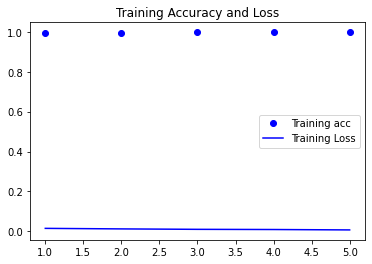

In [37]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training Accuracy and Loss')
plt.legend()

plt.show()

In [41]:
plt.savefig('results/model-6-1/validationplot.jpg')

<Figure size 432x288 with 0 Axes>